<a href="https://colab.research.google.com/github/AlexandrePardelinha/Computer-Science-Masters/blob/main/RFRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd #manipulação de dataset
from sklearn.preprocessing import LabelEncoder #pré-processamento
from sklearn.preprocessing import MinMaxScaler #padronização
from sklearn.neighbors import KNeighborsClassifier #classificador
from sklearn.model_selection import train_test_split #separando em dados teste e treinamento 
from sklearn.metrics import classification_report # metricas de validação
from sklearn.metrics import accuracy_score #acuracia
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score #recall
from sklearn.metrics import f1_score #f1-score
from sklearn.metrics import roc_auc_score #area sob curva roc
from sklearn.metrics import roc_curve #curva roc
from sklearn.metrics import confusion_matrix #matriz de confusão
from matplotlib import pyplot #grafico
import seaborn as sns
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')
dados = pd.read_excel("/content/drive/My Drive/CEFET/solos5.xlsx")

Mounted at /content/drive


In [3]:
dados.head()

,CGHS,acres,Porcentagem,PorcentagemArgila,PorcentagemAreia,PorcentagemSilte,Ksat
0,B,244.1,0.009376,6.0,28.7,65.3,44.6863
1,B,319.7,0.012280,8.9,34.6,56.5,46.8145
2,C,308.5,0.011850,17.3,42.2,40.5,44.6863
3,C,197.3,0.007579,17.3,42.2,40.5,44.6863
4,B,67.9,0.002608,5.0,36.6,58.4,29.0588


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CGHS               420 non-null    object 
 1   acres              420 non-null    float64
 2   Porcentagem        420 non-null    float64
 3   PorcentagemArgila  420 non-null    float64
 4   PorcentagemAreia   420 non-null    float64
 5   PorcentagemSilte   420 non-null    float64
 6   Ksat               420 non-null    float64
dtypes: float64(6), object(1)
memory usage: 23.1+ KB


selecione todas as linhas e coluna 1 do conjunto de dados x e todas as linhas e coluna 2 como y

In [5]:
x = dados.iloc[:, 1:2].values 
print(x)
y = dados.iloc[:, 2].values

[[2.441000e+02]
 [3.197000e+02]
 [3.085000e+02]
 [1.973000e+02]
 [6.790000e+01]
 [1.470000e+01]
 [6.800000e+01]
 [1.015000e+02]
 [2.904000e+02]
 [2.610000e+01]
 [4.200000e+01]
 [1.112500e+03]
 [2.100500e+03]
 [1.180000e+01]
 [3.610000e+01]
 [2.736000e+02]
 [7.860000e+01]
 [1.570600e+03]
 [1.098500e+03]
 [3.610000e+01]
 [7.289000e+02]
 [2.920000e+01]
 [1.259000e+02]
 [2.546000e+02]
 [6.833000e+02]
 [7.000000e+00]
 [3.300000e+01]
 [3.370000e+01]
 [6.600000e+01]
 [5.851000e+02]
 [9.280000e+01]
 [7.106000e+02]
 [5.300000e+01]
 [3.910000e+01]
 [3.010000e+01]
 [1.990000e+01]
 [1.550000e+01]
 [6.900000e+00]
 [1.271000e+02]
 [1.405500e+03]
 [1.562000e+03]
 [1.800000e+02]
 [2.900000e+00]
 [6.265000e+02]
 [2.170800e+03]
 [4.510000e+01]
 [1.430000e+01]
 [1.650000e+01]
 [7.205000e+02]
 [6.759000e+02]
 [2.362000e+02]
 [2.973000e+02]
 [2.280000e+01]
 [5.370000e+01]
 [3.150000e+01]
 [3.470000e+01]
 [8.080000e+01]
 [1.561000e+02]
 [3.324000e+02]
 [7.700000e+00]
 [2.620000e+01]
 [2.290000e+01]
 [1.2800

Ajustar o regressor de floresta aleatório ao conjunto de dados

In [6]:
# Ajustando a regressão de floresta aleatória ao conjunto de dados

# Importar o regressor
from sklearn.ensemble import RandomForestRegressor

# Criar objeto regressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Ajustar o regressor com dados x e y
regressor.fit(x, y)

RandomForestRegressor(random_state=0)

prever um novo resultado

In [7]:
import numpy as np
# Teste a saída alterando os valores
Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1)) 


Visualização do resultado

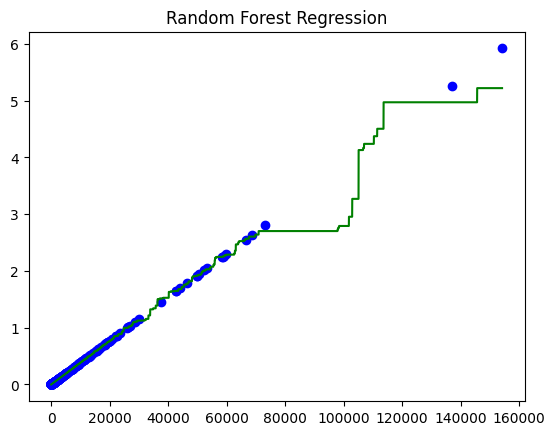

In [8]:
import matplotlib.pyplot as plt
# Visualizando os resultados da Regressão Florestal Aleatória
  
# "arange" para criar um intervalo de valores
# do valor mínimo de x ao máximo 
# valor de x com uma diferença de 0,01 
# entre dois valores consecutivos
X_grid = np.arange(min(x), max(x), 0.01) 
  
# "reshape" para remodelar os dados em uma matriz len(X_grid)*1, 
# i.e. para fazer uma coluna fora do valor X_grid                 
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Gráfico de dispersão para dados originais
plt.scatter(x, y, color = 'blue')  
  
# Traçar dados previstos
plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'green') 
plt.title('Random Forest Regression')
plt.show()

Calculando a Matriz de Confusão nos dados de Teste

In [9]:
Y_pred = regressor.predict(x)
print (pd.crosstab(y,Y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito                 8.373638832358294e-05  0.00010420955115682579  \
Real                                                                    
6.914013714791248e-05                       1                       0   
9.986908699142914e-05                       0                       1   
0.0001113924431827479                       0                       0   
0.00011523356191318749                      0                       0   
0.00012675691810450622                      0                       0   
...                                       ...                     ...   
2.639904875462864                           0                       0   
2.807569708046552                           0                       0   
5.265036808288458                           0                       0   
5.920892467036095                           0                       0   
All                                         1                       1   

Predito                 0.00011073945299857295  0.

R^2 (coeficiente de determinação) 

In [10]:
from sklearn.metrics import r2_score
r2 = r2_score(y, Y_pred)
print('R2: %f' % r2)

R2: 0.995778


F1-Score: ela é uma maneira de visualizarmos as métricas Precision e Recall juntas. Uma maneira de unir as duas métricas seria simplesmente calcular a média aritmética. O problema disso é que existem casos onde a Precision ou a Recall podem ser muito baixas enquanto a outra permanece alta. Isso indicaria problemas na geração de falsos positivos ou negativos, conforme já vimos nos tópicos anteriores. Para ajustar isso, o cálculo é um pouco diferente, mas ainda acaba sendo uma média entre as duas métricas anteriores. 
A média que iremos calcular é a média harmônica, quando os dois valores do cálculo são iguais. Essa média gera resultados muito próximos da média “comum”.

In [11]:
from sklearn.metrics import precision_score

#definir array de classes reais
y = np.repeat([1, 0], repeats=[160, 240])

#definir array de classes previstas
Y_pred = np.repeat([1, 0, 1, 0], repeats=[120, 40, 70, 170])

#calcular F1 score
f1_score(y, Y_pred)

0.6857142857142857

Precisão: grau de variação gerado por diferentes medições. Quanto mais preciso for, menor será a variação entre os valores obtidos. É a tolerância do erro de medição para determinado medidor. A Precision é utilizada para indicar a relação entre as previsões positivas realizadas corretamente e todas as previsões positivas (incluindo as falsas).

In [12]:
from sklearn.metrics import precision_score

precision_score(y, Y_pred)

0.631578947368421

Acurácia: é uma espécie de sema entre exatidão e precisão. Os resultados obtidos por uma experiência não apenas devem ser precisoa, mas também precisam estar perto do valor de referência. Ele é simplesmente a divisão entre todos os acertos pelo total.

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y, Y_pred)

0.725